In [2]:
import sys, os
import numpy as np

In [3]:
thisdir = os.path.dirname('__file__')
libpath = os.path.join(thisdir, '../c3dp')
if not libpath in sys.path:
    sys.path.insert(0, libpath)

In [5]:
import gaugevol.gauge_volume as gv

In [4]:
sample_height=26. #mm
sample_width=4.16 #mm
collimator_openningSize_sample=3. #mm channel opening size
collimator_inner_radius=16.02 #mm
coll_length=380. #mm
collimator_outer_radius=coll_length+collimator_inner_radius
collimator_openningSize_detector=(collimator_outer_radius*collimator_openningSize_sample)/collimator_inner_radius

pointsNum_z=200
pointsNum_y=50
stepsize=0.1
# zS=np.linspace(-sample_height/2., sample_height/2., num=pointsNum_z) #sample_positions_z vertical
# yS=np.linspace(-sample_width/2., sample_width/2., num=pointsNum_y) #sample_positions_y
zS=np.arange(-sample_height/2., sample_height/2., stepsize) #sample_positions_z vertical
yS=np.arange(-sample_width/2., sample_width/2., stepsize) #sample_positions_y
# xS=np.linspace(-sample_width/2., sample_width/2., num=pointsNum) #sample_positions_x
xS=0.

In [5]:
m=np.array(np.meshgrid(xS,yS,zS))
m.shape

(3, 42, 1, 260)

In [6]:
m=m.transpose(1,2,3,0)
m.shape

(42, 1, 260, 3)

In [7]:
m.shape=-1,3
m.shape

(10920, 3)

In [8]:
Cs_square = gv.make_square(collimator_inner_radius, collimator_openningSize_sample)
Cd_square = gv.make_square(collimator_outer_radius, collimator_openningSize_detector)
sample_points = m

theta_phiS = gv.theta_phi(Cs_square, sample_points)
theta_phiD = gv.theta_phi(Cd_square, sample_points)

In [9]:
Syz=sample_points[:,[1,2]].T
Syz.shape

(2, 10920)

In [10]:
sample_pos, gauge_volume = gv.gauge_volume(theta_phiS, theta_phiD, Syz)

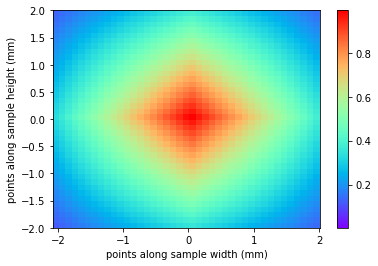

In [11]:
gv.making_plot(sample_pos, gauge_volume, 2,-2 )

In [12]:
sample_pos.shape

(2, 2646)